In [22]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression
import scipy.io
import numpy as np
import matplotlib.pyplot as pyplot
from PIL import Image
import matplotlib.cm as cm
from pprint import pprint
import scipy.misc
import PIL

# IMAGE RESIZER

In [23]:
baseheight = 20
img = Image.open('450.png')
hpercent = (baseheight / float(img.size[1]))
wsize = int((float(img.size[0]) * float(hpercent)))
img = img.resize((wsize, baseheight), PIL.Image.ANTIALIAS)
img.save('image.png')

In [24]:
def is_background(colno):
    row,col=mat.shape
    for i in range(0,row):
        if mat[i][colno]<0.9:
            return False
    return True

In [25]:
def get_matrix(col_no):
    matrix=[]
    row,col=mat.shape
    for i in range(col_no,col):
        if is_background(i)==False:
            z=mat[:,i]
            matrix.append(z)
        else:
            break
    matrix=np.matrix(matrix)
    matrix=np.transpose(matrix)
    pyplot.imshow(matrix,cmap=cm.gray)
    pyplot.show()
    image_arr.append(matrix.tolist())
    return i

In [26]:
def get_char_img():
    row,col=mat.shape
    col_no=0
    curr_col=0
    while True:
        for i in range(curr_col,col):
            found=is_background(i)
            if found==False:
                col_no=i
                break
        if i==col-1:
            break
        else:
            curr_col=get_matrix(col_no)
        

In [27]:
def process_image():
    img=scipy.misc.imread('image.png')
    img=img[:,:,0]
    img=img/255.0
    pyplot.imshow(img,cmap=cm.gray)
    pyplot.show()
    return img

# SEGMENTED IMAGE PADDING FUNCTION

In [28]:
def pad_image(image):
    col=len(image[0])
    reqd_col=20-col
    front=reqd_col/2
    back=reqd_col-front
    
    for i in range(20):
        for j in range(front):
            image[i].insert(0,1)
        for j in range(back):
            image[i].append(1)
    pyplot.imshow(np.matrix(image),cmap=cm.gray)
    pyplot.show()    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


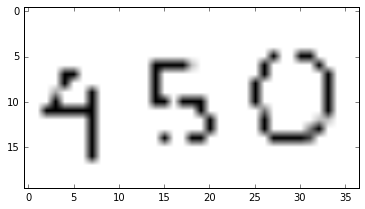

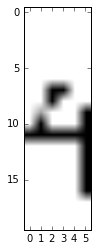

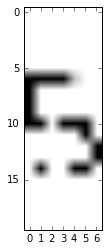

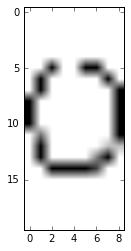

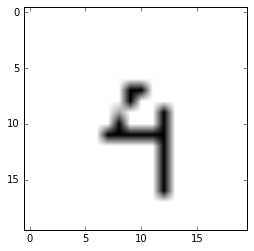

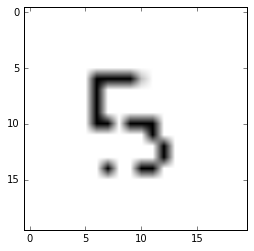

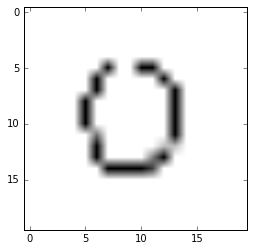

In [29]:
img=process_image()
image_arr=[]
mat=img
get_char_img()
for i in image_arr:
    pad_image(i)
